/tmp/ipython-input-619578854.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Fecha_Real').resample('M')['Ingresos'].sum().plot(kind='line', marker='o', color='teal')


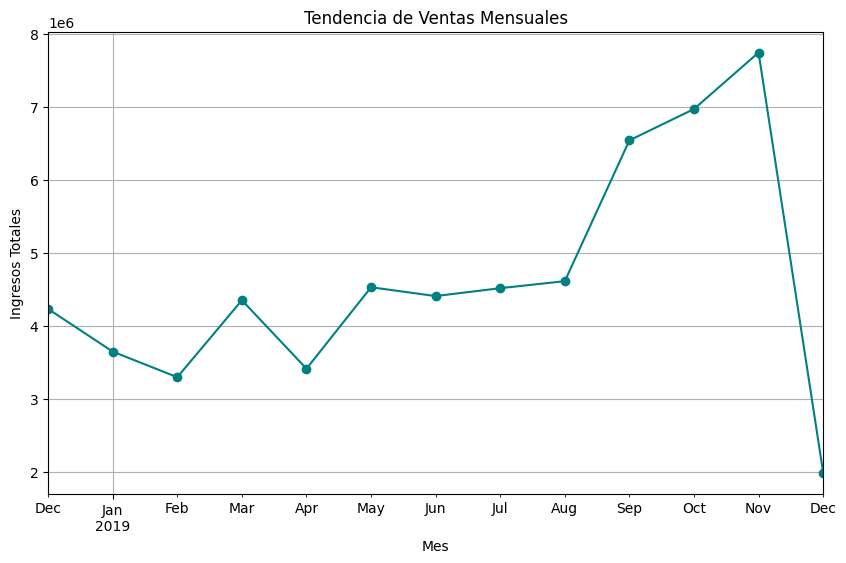

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar y limpiar nombres
df = pd.read_csv('Sales_Transaction.csv')
df.columns = df.columns.str.strip()

# 2. Convertir la columna 'Date' a formato de fecha real
# Usamos dayfirst=True si tus datos vienen como DD/MM/YYYY
df['Fecha_Real'] = pd.to_datetime(df['Date'], errors='coerce')

# 3. Crear columna de Ingresos
df['Ingresos'] = df['Quantity'] * df['Price']

# 4. Eliminar filas donde la fecha falló (por si hay datos corruptos)
df = df.dropna(subset=['Fecha_Real'])

# 5. Gráfico de ventas por mes
plt.figure(figsize=(10, 6))
df.set_index('Fecha_Real').resample('M')['Ingresos'].sum().plot(kind='line', marker='o', color='teal')
plt.title('Tendencia de Ventas Mensuales')
plt.ylabel('Ingresos Totales')
plt.xlabel('Mes')
plt.grid(True)
plt.show()

/tmp/ipython-input-2460309579.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_productos, x='Ingresos', y='ProductName', palette='viridis')


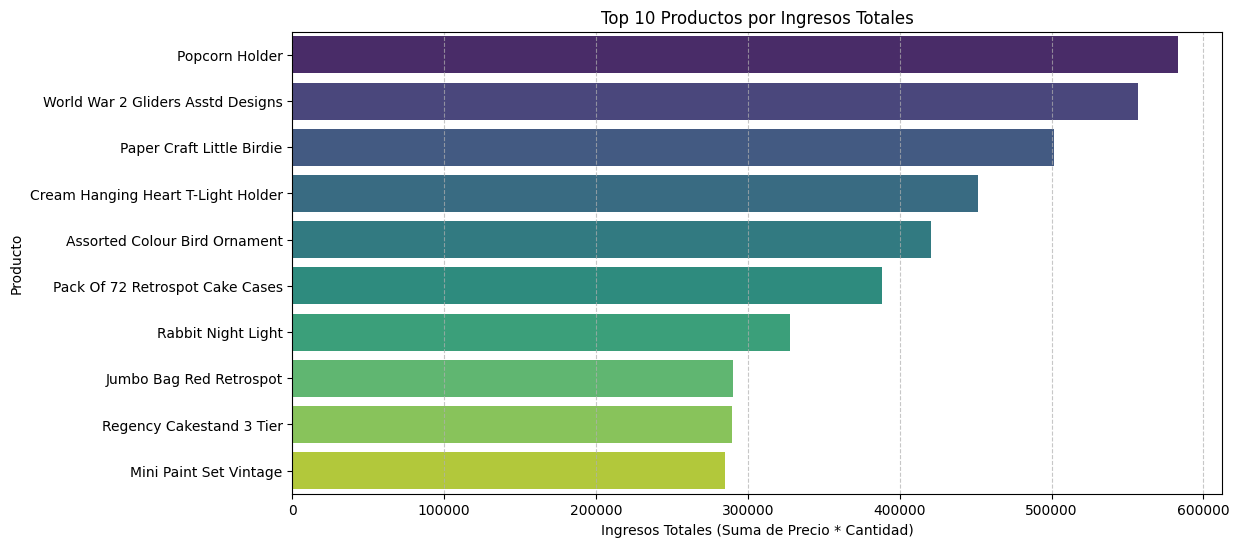

In [9]:
# 1. Agrupar por nombre de producto y sumar los ingresos
top_productos = df.groupby('ProductName')['Ingresos'].sum().nlargest(10).reset_index()

# 2. Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=top_productos, x='Ingresos', y='ProductName', hue='ProductName', palette='viridis', legend=False)

# 3. Personalización del gráfico
plt.title('Top 10 Productos por Ingresos Totales')
plt.xlabel('Ingresos Totales (Suma de Precio * Cantidad)')
plt.ylabel('Producto')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()